In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np

from wgomoku import (
    GomokuBoard, HeuristicGomokuPolicy, Heuristics, ThreatSearch,
    StochasticMaxSampler, ValueTracker,GomokuTools as gt)

In [3]:
heuristics = Heuristics(kappa=3.0)
ts = ThreatSearch(max_depth=6, max_width=5)
p = HeuristicGomokuPolicy(bias=.5,topn=5, style=2, threat_search=ts)

In [4]:
A,B,C,D,E,F,G,H,I, J, K, L, M, N, O, P, Q, R, S, T, U = \
1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
BLACK, WHITE, EDGES = 0,1,2

In [5]:
import pandas as pd
SIZE=19
df = pd.read_csv("newgames1.csv", header=None)
df.columns = ['board', 'win']
games = df['board']

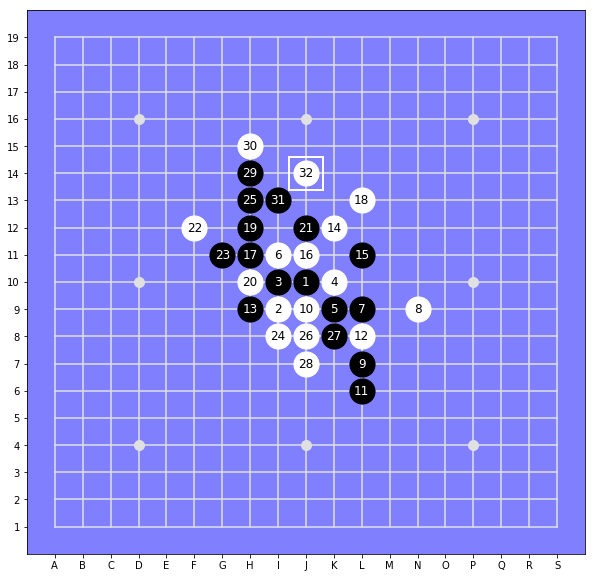

In [6]:
stones = gt.string_to_stones(games[1])
board = GomokuBoard(disp_width=10, N=SIZE, heuristics= heuristics, stones = stones)
board.display()

In [7]:
tracker = ValueTracker(p)
tracker.reg_variants(board)

In [8]:
tracker.reg

{4244521905871043933: [1,
  'j10i9i10k10k9i11l9n9l7j9l6l8h9k12l11j11h11l13h12h10j12f12g11i8h13j8k8j7h14h15i13j14'],
 4164410208426318358: [1,
  'j10i9i10k10k9i11l9n9l7j9l6l8h9k12l11j11h11l13h12h10j12f12g11i8h13j8k8j7h14h15i13f10'],
 4081837372145420717: [1,
  'j10i9i10k10k9i11l9n9l7j9l6l8h9k12l11j11h11l13h12h10j12f12g11i8h13j8k8j7h14h15i13k11'],
 2089891599014223647: [1,
  'j10i9i10k10k9i11l9n9l7j9l6l8h9k12l11j11h11l13h12h10j12f12g11i8h13j8k8j7h14h15i13g15'],
 -7744933890820438898: [-1,
  'j10i9i10k10k9i11l9n9l7j9l6l8h9k12l11j11h11l13h12h10j12f12g11i8h13j8k8j7h14h15i13'],
 -3306699071882679108: [1,
  'j10i9i10k10k9i11l9n9l7j9l6l8h9k12l11j11h11l13h12h10j12f12g11i8h13j8k8j7h14h15'],
 -4302392348583733801: [-1,
  'j10i9i10k10k9i11l9n9l7j9l6l8h9k12l11j11h11l13h12h10j12f12g11i8h13j8k8j7h14']}

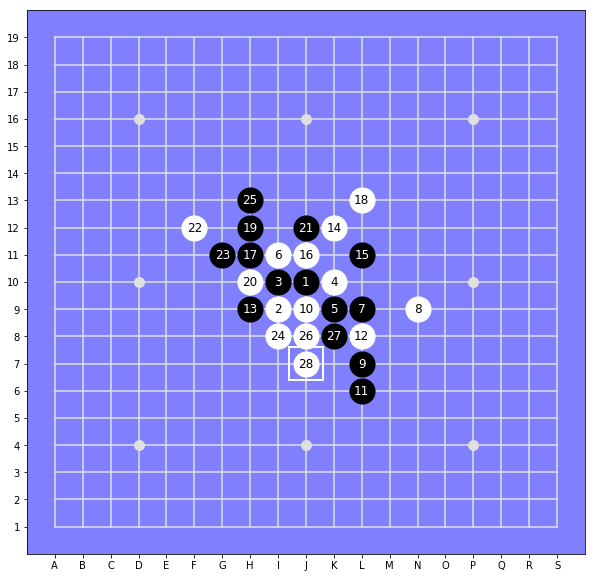

In [9]:
from copy import deepcopy
won = True
while won:
    prev = deepcopy(board)
    board.undo().undo()
    (moves,won),_ = ts.is_tseq_won(board)
    
prev.display()
_,tree = ts.is_tseq_won(prev)

In [10]:
terminated = tree.select(lambda n: n.value != 0)

In [11]:
len(tree.all_trajectories())

2

In [12]:
tracker = ValueTracker(p)
for t in tree.all_trajectories():
    b = GomokuBoard(disp_width=9, N=19, heuristics=heuristics, stones = t[0])
    tracker.reg_variants(b)
tracker, len(tracker.reg)

([[1, 'j10i9i10k10k9i11l9n9l7j9l6l8h9k12l11j11h11l13h12h10j12f12g11i8h13j8k8j7h14h15i13k11'], [1, 'j10i9i10k10k9i11l9n9l7j9l6l8h9k12l11j11h11l13h12h10j12f12g11i8h13j8k8j7h14h15i13f10'], [1, 'j10i9i10k10k9i11l9n9l7j9l6l8h9k12l11j11h11l13h12h10j12f12g11i8h13j8k8j7h14h15i13j14'], [1, 'j10i9i10k10k9i11l9n9l7j9l6l8h9k12l11j11h11l13h12h10j12f12g11i8h13j8k8j7h14h15i13g15'], [-1, 'j10i9i10k10k9i11l9n9l7j9l6l8h9k12l11j11h11l13h12h10j12f12g11i8h13j8k8j7h14h15i13'], [1, 'j10i9i10k10k9i11l9n9l7j9l6l8h9k12l11j11h11l13h12h10j12f12g11i8h13j8k8j7h14h15'], [-1, 'j10i9i10k10k9i11l9n9l7j9l6l8h9k12l11j11h11l13h12h10j12f12g11i8h13j8k8j7h14']],
 7)

In [13]:
trajectories = [(l[1], l[0]) for l in tracker.reg.values()]

In [14]:
for t in trajectories:
    stones = gt.string_to_stones(t[0])
    value = t[1]
    if value == 1:
        to_go = stones[-10:]
        stones = stones[:-10]
    elif value == -1:
        to_go = stones[-9:]
        stones = stones[:-9]
    value = 1
    board = GomokuBoard(
        disp_width=10, N=19, heuristics= heuristics, stones = stones)  
    for x,y in to_go:
        tracker.reg_variants(board, value)
        value = -value
        board.set(x,y)

In [15]:
tracker, len(tracker.reg)

([[1, 'j10i9i10k10k9i11l9n9l7j9l6l8h9k12l11j11h11l13h12h10j12f12g11i8h13j8k8j7h14h15i13k11'], [1, 'j10i9i10k10k9i11l9n9l7j9l6l8h9k12l11j11h11l13h12h10j12f12g11i8h13j8k8j7h14h15i13f10'], [1, 'j10i9i10k10k9i11l9n9l7j9l6l8h9k12l11j11h11l13h12h10j12f12g11i8h13j8k8j7h14h15i13j14'], [1, 'j10i9i10k10k9i11l9n9l7j9l6l8h9k12l11j11h11l13h12h10j12f12g11i8h13j8k8j7h14h15i13g15'], [-1, 'j10i9i10k10k9i11l9n9l7j9l6l8h9k12l11j11h11l13h12h10j12f12g11i8h13j8k8j7h14h15i13'], [1, 'j10i9i10k10k9i11l9n9l7j9l6l8h9k12l11j11h11l13h12h10j12f12g11i8h13j8k8j7h14h15'], [-1, 'j10i9i10k10k9i11l9n9l7j9l6l8h9k12l11j11h11l13h12h10j12f12g11i8h13j8k8j7h14'], [1, 'j10i9i10k10k9i11l9n9l7j9l6l8h9k12l11j11h11l13h12h10j12f12'], [-1, 'j10i9i10k10k9i11l9n9l7j9l6l8h9k12l11j11h11l13h12h10j12f12g11'], [1, 'j10i9i10k10k9i11l9n9l7j9l6l8h9k12l11j11h11l13h12h10j12f12g11i8'], [-1, 'j10i9i10k10k9i11l9n9l7j9l6l8h9k12l11j11h11l13h12h10j12f12g11i8h13'], [1, 'j10i9i10k10k9i11l9n9l7j9l6l8h9k12l11j11h11l13h12h10j12f12g11i8h13j8'], [-1, 'j10i9i

### Quality check

In [16]:
ts = ThreatSearch(max_depth=6, max_width=3)
faults=[]
for t in trajectories:
    stones = gt.string_to_stones(t[0])
    value = t[1]
    board = GomokuBoard(
        disp_width=10, N=19, heuristics= heuristics, stones = stones)  
    state = board.game_state()
    if state != 0 and state != value:
        print("Discrepenccy: ", t[0], state, value)
        faults.append(t)
    elif value == 1:
        (_, won), _ = ts.is_tseq_won(board)
        if not won:
            print("Not a threat:", t[0], value)
            faults.append(t)
    elif value == -1:
        move = p.suggest(bias=10.0, topn=5, board=board, style=2)
        board.set(move.x, move.y)
        (_, won), _ = ts.is_tseq_won(board)
        if not won:
            print("Not a threat:", t[0], value)
            faults.append(t)
faults

[]